# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_df = pd.merge(study_results , mouse_metadata , how="left", on="Mouse ID")

# Display the data table for preview
mice_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
count_mice = mice_df["Mouse ID"].nunique()
count_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mice_df.loc[mice_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicat_row_series = mice_df["Mouse ID"].isin(duplicate_mice)
all_duplicate_rows = mice_df.loc[duplicat_row_series]
all_duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mice_df.loc[~duplicat_row_series]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [8]:
count_mice2 = clean_df["Mouse ID"].nunique()
count_mice2

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_df = clean_df.groupby(['Drug Regimen'])
summary_mean = summary_df['Tumor Volume (mm3)'].mean()
summary_med = summary_df['Tumor Volume (mm3)'].median()
summary_var = summary_df['Tumor Volume (mm3)'].var()
summary_std = summary_df['Tumor Volume (mm3)'].std()
summary_sem = summary_df['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({
                        "Mean Tumor Volume": summary_mean,
                        "Median Tumor Volume" : summary_med,
                        "Tumor Volume Variance" : summary_var,
                        "Tumor Volume Std. Dev." : summary_std,
                        "Tumor Volume Std. Err." : summary_sem
                        })
summary_df




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = clean_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
summary_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

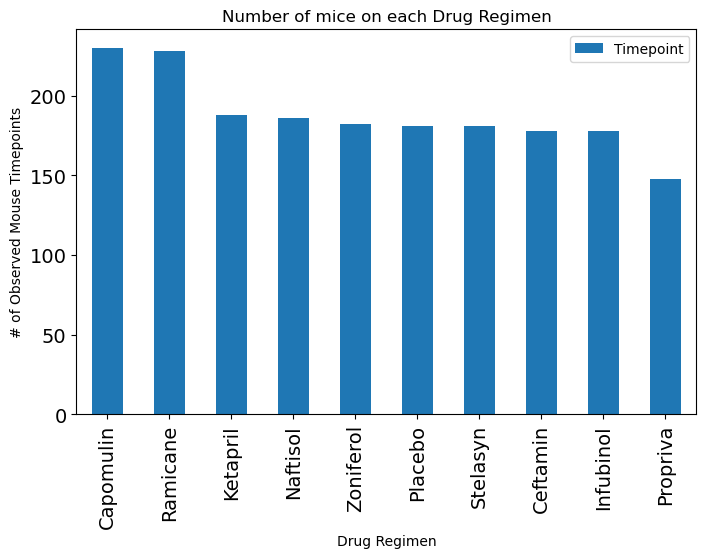

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint = clean_df.groupby(['Drug Regimen'])['Timepoint'].count()
timepoint.sort_values(ascending=False).plot.bar(figsize=(8,5), title ="Number of mice on each Drug Regimen",fontsize = 14)  
plt.ylabel("# of Observed Mouse Timepoints",fontsize = 10)
plt.legend(loc="best")
plt.show()

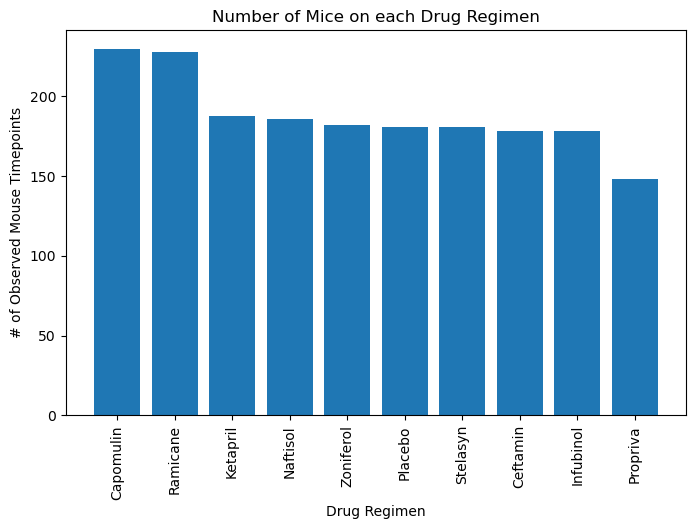

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# To sort values:
timepoint_desc = timepoint.sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.bar(timepoint_desc.index, timepoint_desc.values)
plt.title("Number of Mice on each Drug Regimen")
# x lable:
plt.xlabel('Drug Regimen', size=10)
# y lable:
plt.ylabel('# of Observed Mouse Timepoints', size=10)
# To have xticks as shown:
plt.xticks(rotation='vertical')                               
plt.show()


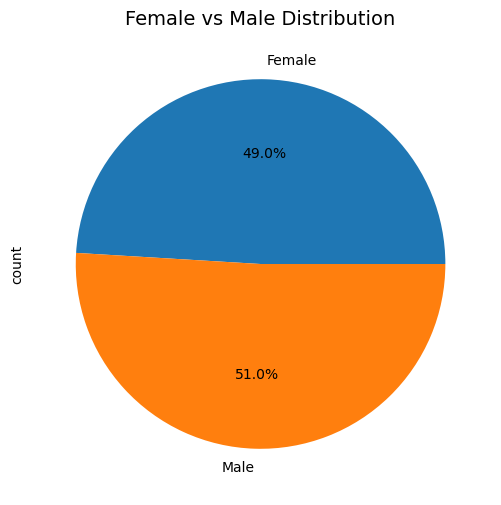

In [18]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex = clean_df.groupby(['Sex'])['Sex'].count()           

# Make the pie 
plt.figure(figsize=(6, 6))  # Make the chart smaller
sex.plot.pie(autopct='%1.1f%%', startangle=0, fontsize=10)
plt.ylabel('count')  # Hide the y-axis label for pie chart
plt.title("Female vs Male Distribution", fontsize=14)  # Add title with font size
plt.show()


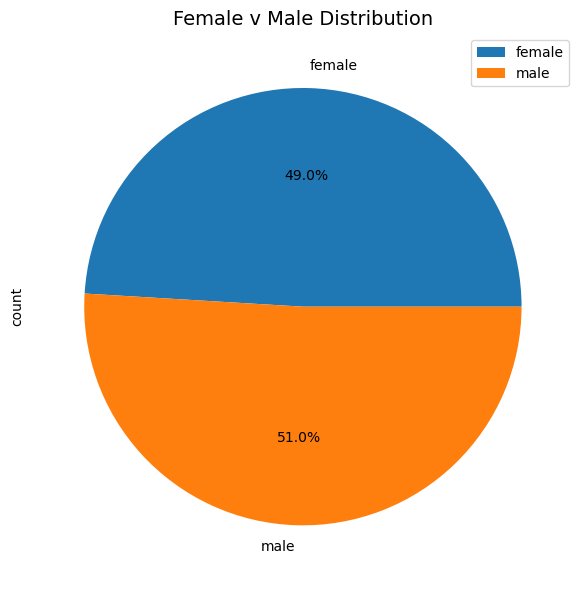

In [19]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
# Make the pie chart

plt.figure(figsize=(6,6))
plt.pie(sex, labels=('female', 'male'), autopct='%1.1f%%')
plt.title("Female v Male Distribution",fontsize = 14)
plt.ylabel('count', size=10)
plt.tight_layout()
plt.legend(loc= "best")
plt.show()



## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = clean_df.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max()
greatest_tp


Drug Regimen  Mouse ID
Capomulin     b128        45
              b742        45
              f966        20
              g288        45
              g316        45
                          ..
Zoniferol     q633        45
              s337        45
              w140         5
              w575        45
              x613        15
Name: Timepoint, Length: 248, dtype: int64

In [21]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_tp_df = pd.DataFrame(greatest_tp)
greatest_tp_df = pd.merge(greatest_tp_df, clean_df, on=('Drug Regimen', 'Mouse ID', 'Timepoint'), how='left')
greatest_tp_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
243,Zoniferol,q633,45,70.827796,2,Male,12,25
244,Zoniferol,s337,45,62.109651,4,Male,14,27
245,Zoniferol,w140,5,47.717952,0,Female,19,30
246,Zoniferol,w575,45,68.401286,3,Female,16,28


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
treatment= ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment:
    volume_df = greatest_tp_df.loc[greatest_tp_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol.append(volume_df)

    


    # Determine outliers using upper and lower bounds
    quartiles = volume_df.quantile([0.25,0.5,0.75])
    IQR = quartiles[0.75] - quartiles[0.25]
    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)


# Determine outliers using upper and lower bounds
    outliers = volume_df.loc[(volume_df > upper_bound) | (volume_df < lower_bound)]
   # print(f"{(outliers)}")
    print(f"Outlier: {(outliers)}")



Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [45]:
IQR

15.577752179999997

In [24]:
lower_bound

25.355449580000002

In [26]:
upper_bound

87.66645829999999

In [27]:
tumor_vol

[0     38.982878
 1     38.939633
 2     30.485985
 3     37.074024
 4     40.159220
 5     47.685963
 6     37.311846
 7     38.125164
 8     38.753265
 9     41.483008
 10    38.846876
 11    28.430964
 12    33.329098
 13    46.539206
 14    32.377357
 15    41.581521
 16    23.343598
 17    40.728578
 18    34.455298
 19    31.023923
 20    40.658124
 21    39.952347
 22    36.041047
 23    28.484033
 24    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 174    38.407618
 175    43.047543
 176    38.810366
 177    32.978522
 178    38.342008
 179    33.397653
 180    37.311236
 181    40.659006
 182    29.128472
 183    33.562402
 184    36.374510
 185    31.560470
 186    36.134852
 187    22.050126
 188    30.564625
 189    31.095335
 190    45.220869
 191    36.561652
 192    37.225650
 193    43.419381
 194    30.276232
 195    40.667713
 196    43.166373
 197    44.183451
 198    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 50    67.973419
 51    65.525743
 52  

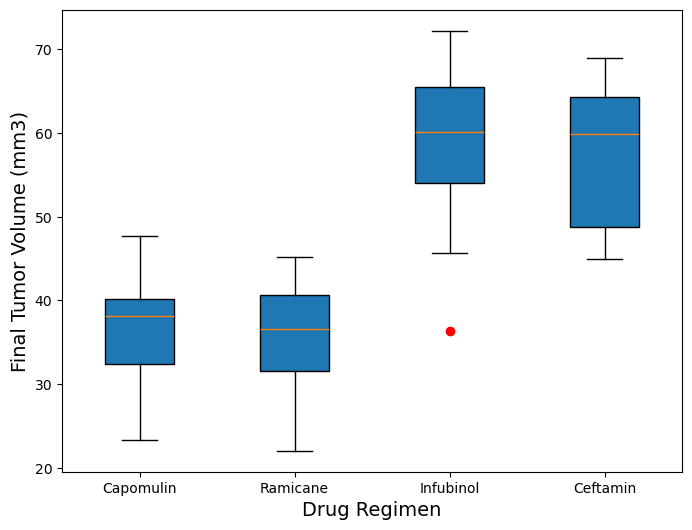

In [32]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor="r",marker="o", markeredgecolor="r")
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.boxplot(tumor_vol, flierprops=red_dot, patch_artist=True)

#ax1.set_title("Tumor Volume (mm3) across four Regimens",fontsize =18)
ax1.set_xlabel("Drug Regimen",fontsize = 14)
ax1.set_ylabel("Final Tumor Volume (mm3)",fontsize = 14)
ax1.xaxis.set(ticks=range(1,len(treatment) + 1),ticklabels=treatment)
plt.show()



## Line and Scatter Plots

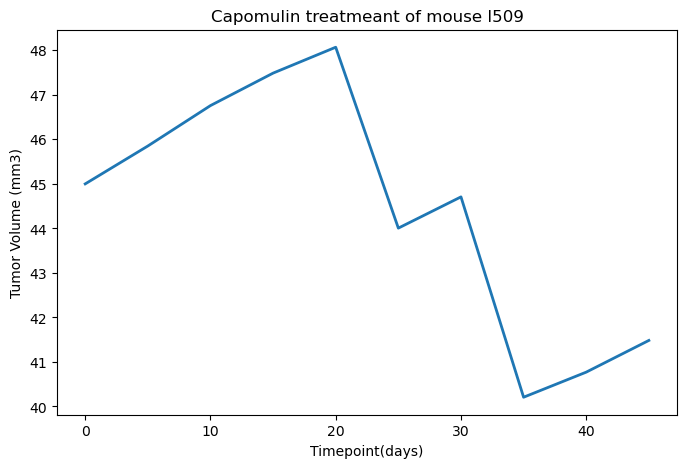

In [33]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = clean_df.loc[clean_df["Mouse ID"] == "l509",:]
line_df

time = line_df["Timepoint"]
vol = line_df["Tumor Volume (mm3)"] 
#print(random_mouse["Mouse ID"])
plt.figure(figsize=(8,5))
line, = plt.plot(time, vol, linewidth=2, markersize=12)
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatmeant of mouse l509")
plt.show()


In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

In [35]:
# To find out type of variables
scatter_df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

C:\Users\zarap\AppData\Local\Temp\ipykernel_24560\2419526526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter_df['Weight (g)'] = pd.to_numeric(scatter_df['Weight (g)'], errors='coerce')
C:\Users\zarap\AppData\Local\Temp\ipykernel_24560\2419526526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter_df['Tumor Volume (mm3)'] = pd.to_numeric(scatter_df['Tumor Volume (mm3)'], errors='coerce')


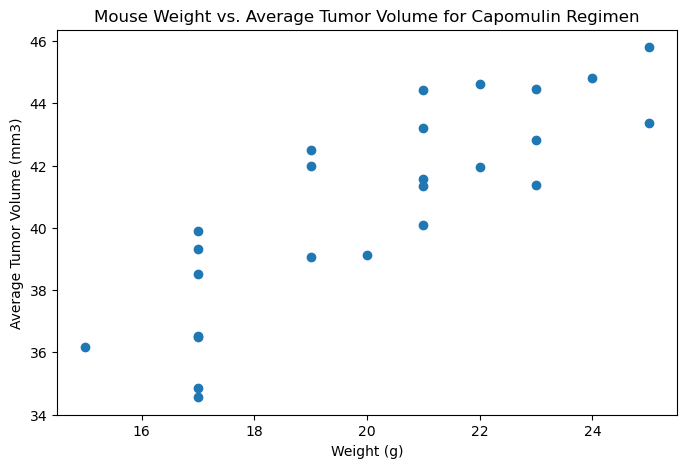

In [38]:
# Ensure columns are numeric
scatter_df['Weight (g)'] = pd.to_numeric(scatter_df['Weight (g)'], errors='coerce')
scatter_df['Tumor Volume (mm3)'] = pd.to_numeric(scatter_df['Tumor Volume (mm3)'], errors='coerce')

# Group by 'Mouse ID' and calculate mean for numeric columns
vol_avg = scatter_df.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()
# Create scatter plot
plt.figure(figsize=(8,5))
plt.scatter(vol_avg['Weight (g)'], vol_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()


In [39]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation=round(st.pearsonr(vol_avg['Weight (g)'],vol_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")


The correlation between mouse weight and average tumor volume is 0.84


In [40]:
# 0.84 is considered a strong positive correlation so slop must be positive
# calculating linear regression values using st.linregress() function passing parameters from the capavg dataframe
lin_reg=st.linregress(vol_avg['Weight (g)'],vol_avg['Tumor Volume (mm3)'])
lin_reg

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [41]:
slope=0.9544396890241045
intercept=21.552160532685015 
rvalue=0.8419363424694718
pvalue=1.3225722434712642e-07 
stderr=0.1275435903320134

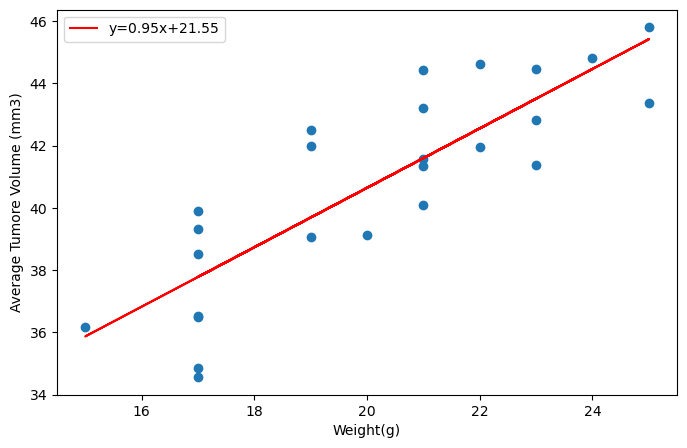

In [42]:
# ploting the regression line
# calculate the the linear line plot list of values
line = slope*(vol_avg['Weight (g)'])+intercept
# create the scatter plot like above
plt.figure(figsize=(8,5))
plt.scatter(vol_avg['Weight (g)'],vol_avg['Tumor Volume (mm3)'])
# plot the linear regression line which is the averaged line of all the values in red
# I used the .format() function to create a label of the red line using the slope and intercept from above
plt.plot(vol_avg['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.legend(loc="best")
plt.show()